In [1]:
import numpy as np
import cv2
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
img = cv2.imread('../Images_Dataset/Cristiano_Ronaldo/120.jpg')
img.shape

(1109, 904, 3)

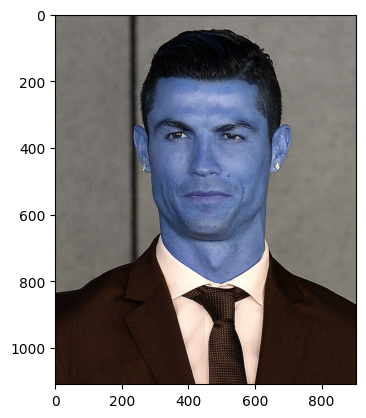

In [3]:
plt.imshow(img)

In [4]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray.shape

(1109, 904)

In [5]:
gray

array([[110, 119, 117, ..., 128, 124, 129],
       [123, 122, 115, ..., 131, 131, 136],
       [121, 117, 116, ..., 133, 134, 134],
       ...,
       [ 23,  23,  19, ...,  29,  25,  28],
       [ 27,  23,  18, ...,  24,  20,  24],
       [ 28,  22,  16, ...,  22,  18,  22]], dtype=uint8)

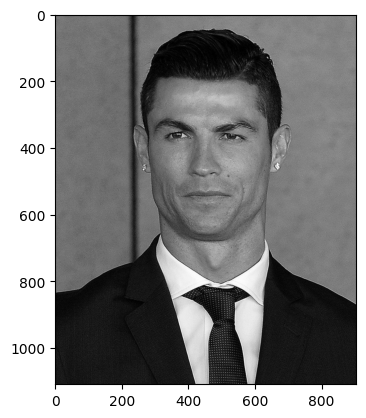

In [6]:
plt.imshow(gray, cmap='gray')

In [7]:
face_cascade = cv2.CascadeClassifier('../opencv/haarcascades/haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier('../opencv/haarcascades/haarcascade_eye.xml')

faces = face_cascade.detectMultiScale(gray, 1.3, 5)
faces

array([[228, 192, 445, 445]])

In [8]:
(x,y,w,h) = faces[0]
x,y,w,h

(228, 192, 445, 445)

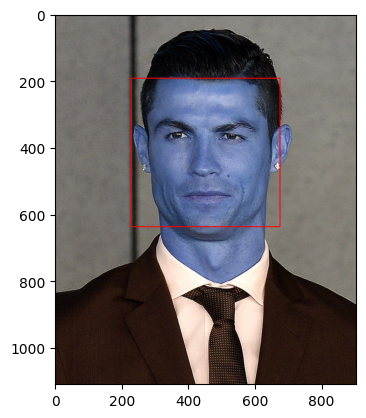

In [9]:
face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
plt.imshow(face_img)

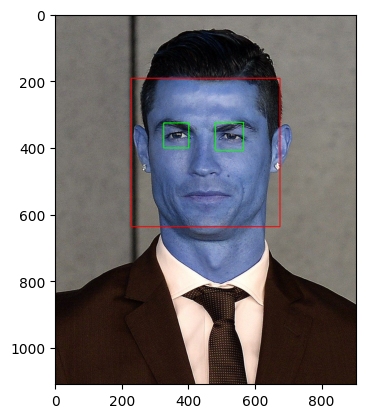

In [10]:
cv2.destroyAllWindows()
for (x,y,w,h) in faces:
    face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = face_img[y:y+h, x:x+w]
    eyes = eye_cascade.detectMultiScale(roi_gray)
    for (ex,ey,ew,eh) in eyes:
        cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)
        

plt.figure()
plt.imshow(face_img, cmap='gray')
plt.show()

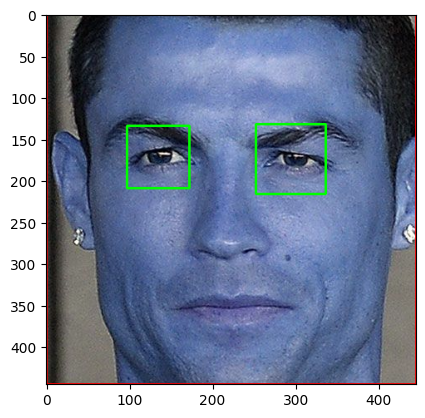

In [11]:
%matplotlib inline
plt.imshow(roi_color, cmap='gray')

In [12]:
cropped_img = np.array(roi_color)
cropped_img.shape

(445, 445, 3)

In [13]:
import numpy as np
import pywt
import cv2    

def w2d(img, mode='haar', level=1):
    imArray = img
    imArray = cv2.cvtColor( imArray,cv2.COLOR_RGB2GRAY )
    imArray =  np.float32(imArray)   
    imArray /= 255;
    coeffs=pywt.wavedec2(imArray, mode, level=level)
    coeffs_H=list(coeffs)  
    coeffs_H[0] *= 0;  
    imArray_H=pywt.waverec2(coeffs_H, mode);
    imArray_H *= 255;
    imArray_H =  np.uint8(imArray_H)

    return imArray_H

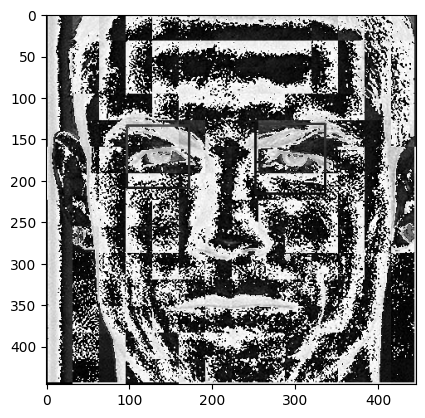

In [14]:
im_har = w2d(cropped_img,'db1',5)
plt.imshow(im_har, cmap='gray')

In [15]:
def get_cropped_image_if_2_eyes(image_path):
    img = cv2.imread(image_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)
    for (x,y,w,h) in faces:
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = img[y:y+h, x:x+w]
        eyes = eye_cascade.detectMultiScale(roi_gray)
        if len(eyes) >= 2:
            return roi_color

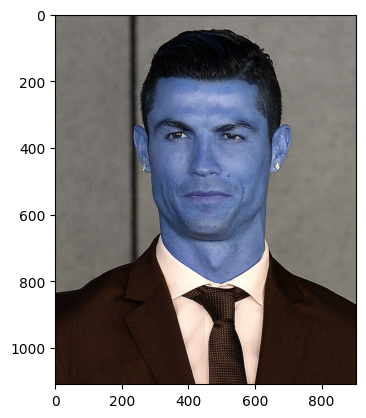

In [16]:
original_image = cv2.imread('../Images_Dataset/Cristiano_Ronaldo/120.jpg')
plt.imshow(original_image)

In [17]:
cropped_image_no_2_eyes = get_cropped_image_if_2_eyes('../Images_Dataset/Cristiano_Ronaldo/120.jpg')
cropped_image_no_2_eyes

array([[[ 68,  68,  68],
        [ 58,  58,  58],
        [ 43,  44,  42],
        ...,
        [140, 137, 129],
        [135, 132, 124],
        [151, 148, 140]],

       [[ 57,  56,  58],
        [ 52,  51,  53],
        [ 38,  38,  38],
        ...,
        [134, 131, 123],
        [135, 132, 124],
        [136, 134, 124]],

       [[ 50,  49,  51],
        [ 51,  50,  52],
        [ 43,  43,  43],
        ...,
        [136, 133, 125],
        [135, 132, 124],
        [132, 130, 120]],

       ...,

       [[ 73,  71,  63],
        [ 61,  60,  50],
        [ 56,  55,  45],
        ...,
        [140, 134, 123],
        [141, 135, 124],
        [137, 130, 121]],

       [[ 73,  72,  62],
        [ 71,  70,  60],
        [ 61,  60,  50],
        ...,
        [141, 135, 124],
        [144, 138, 127],
        [144, 137, 128]],

       [[ 73,  72,  62],
        [ 74,  73,  63],
        [ 62,  62,  50],
        ...,
        [127, 121, 110],
        [139, 133, 122],
        [144, 137, 128]]

In [18]:
cropped_image_no_2_eyes.shape

(445, 445, 3)

In [19]:
path_to_data = "../Images_Dataset/"
path_to_cr_data = "./Dataset/Cropped/"

In [20]:
import os
img_dirs = []
for entry in os.scandir(path_to_data):
    if entry.is_dir():
        img_dirs.append(entry.path)

In [21]:
img_dirs

['../Images_Dataset/Alisson_Becker',
 '../Images_Dataset/Bernado_Silva',
 '../Images_Dataset/Cristiano_Ronaldo',
 '../Images_Dataset/Cristian_Romero',
 '../Images_Dataset/Dominik_Szoboszlai',
 '../Images_Dataset/Ederson',
 '../Images_Dataset/Erling_haaland',
 '../Images_Dataset/Frenkie_De_Jong',
 '../Images_Dataset/Gavi',
 '../Images_Dataset/Harry_Kane',
 '../Images_Dataset/Heung_Min_Son',
 '../Images_Dataset/Jamal_Musiala',
 '../Images_Dataset/James_Maddison',
 '../Images_Dataset/Joshua_Kimmich',
 '../Images_Dataset/Jude_Bellingham',
 '../Images_Dataset/Julian_Alvarez',
 '../Images_Dataset/Kevin_De_Bruyne',
 '../Images_Dataset/Leonal_Messi',
 '../Images_Dataset/Luka_Modric',
 '../Images_Dataset/Martin_Odeggard',
 '../Images_Dataset/Mohammad_Salah',
 '../Images_Dataset/Mykhailo_Mudryk',
 '../Images_Dataset/Neymar_Junior',
 '../Images_Dataset/Paulo_Dybala',
 '../Images_Dataset/Pedri',
 '../Images_Dataset/Robert_Lewandowski',
 '../Images_Dataset/Ruben_Diaz',
 '../Images_Dataset/Sergio_Ra

In [22]:
import shutil
if os.path.exists(path_to_cr_data):
     shutil.rmtree(path_to_cr_data)
os.mkdir(path_to_cr_data)

In [23]:
cropped_image_dirs = []
celebrity_file_names_dict = {}
for img_dir in img_dirs:
    count = 1
    celebrity_name = img_dir.split('/')[-1]
    celebrity_file_names_dict[celebrity_name] = []
    for entry in os.scandir(img_dir):
        roi_color = get_cropped_image_if_2_eyes(entry.path)
        if roi_color is not None:
            cropped_folder = path_to_cr_data + celebrity_name
            if not os.path.exists(cropped_folder):
                os.makedirs(cropped_folder)
                cropped_image_dirs.append(cropped_folder)
                print("Generating cropped images in folder: ",cropped_folder)
            cropped_file_name = celebrity_name + str(count) + ".png"
            cropped_file_path = cropped_folder + "/" + cropped_file_name
            cv2.imwrite(cropped_file_path, roi_color)
            celebrity_file_names_dict[celebrity_name].append(cropped_file_path)
            count += 1

Generating cropped images in folder:  ./Dataset/Cropped/Alisson_Becker
Generating cropped images in folder:  ./Dataset/Cropped/Bernado_Silva
Generating cropped images in folder:  ./Dataset/Cropped/Cristiano_Ronaldo
Generating cropped images in folder:  ./Dataset/Cropped/Cristian_Romero
Generating cropped images in folder:  ./Dataset/Cropped/Dominik_Szoboszlai
Generating cropped images in folder:  ./Dataset/Cropped/Ederson
Generating cropped images in folder:  ./Dataset/Cropped/Erling_haaland
Generating cropped images in folder:  ./Dataset/Cropped/Frenkie_De_Jong
Generating cropped images in folder:  ./Dataset/Cropped/Gavi
Generating cropped images in folder:  ./Dataset/Cropped/Harry_Kane
Generating cropped images in folder:  ./Dataset/Cropped/Heung_Min_Son
Generating cropped images in folder:  ./Dataset/Cropped/Jamal_Musiala
Generating cropped images in folder:  ./Dataset/Cropped/James_Maddison
Generating cropped images in folder:  ./Dataset/Cropped/Joshua_Kimmich
Generating cropped im

In [40]:
print(cropped_image_dirs)

['./Dataset/Cropped/Alisson_Becker', './Dataset/Cropped/Bernado_Silva', './Dataset/Cropped/Cristiano_Ronaldo', './Dataset/Cropped/Cristian_Romero', './Dataset/Cropped/Dominik_Szoboszlai', './Dataset/Cropped/Ederson', './Dataset/Cropped/Erling_haaland', './Dataset/Cropped/Frenkie_De_Jong', './Dataset/Cropped/Gavi', './Dataset/Cropped/Harry_Kane', './Dataset/Cropped/Heung_Min_Son', './Dataset/Cropped/Jamal_Musiala', './Dataset/Cropped/James_Maddison', './Dataset/Cropped/Joshua_Kimmich', './Dataset/Cropped/Jude_Bellingham', './Dataset/Cropped/Julian_Alvarez', './Dataset/Cropped/Kevin_De_Bruyne', './Dataset/Cropped/Leonal_Messi', './Dataset/Cropped/Luka_Modric', './Dataset/Cropped/Martin_Odeggard', './Dataset/Cropped/Mohammad_Salah', './Dataset/Cropped/Mykhailo_Mudryk', './Dataset/Cropped/Neymar_Junior', './Dataset/Cropped/Paulo_Dybala', './Dataset/Cropped/Pedri', './Dataset/Cropped/Robert_Lewandowski', './Dataset/Cropped/Ruben_Diaz', './Dataset/Cropped/Sergio_Ramos', './Dataset/Cropped/Th

In [41]:
cropped_image_dirs = ['./Dataset/Cropped/Alisson_Becker', './Dataset/Cropped/Bernado_Silva', './Dataset/Cropped/Cristiano_Ronaldo', './Dataset/Cropped/Cristian_Romero', './Dataset/Cropped/Dominik_Szoboszlai', './Dataset/Cropped/Ederson', './Dataset/Cropped/Erling_haaland', './Dataset/Cropped/Frenkie_De_Jong', './Dataset/Cropped/Gavi', './Dataset/Cropped/Harry_Kane', './Dataset/Cropped/Heung_Min_Son', './Dataset/Cropped/Jamal_Musiala', './Dataset/Cropped/James_Maddison', './Dataset/Cropped/Joshua_Kimmich', './Dataset/Cropped/Jude_Bellingham', './Dataset/Cropped/Julian_Alvarez', './Dataset/Cropped/Kevin_De_Bruyne', './Dataset/Cropped/Leonal_Messi', './Dataset/Cropped/Luka_Modric', './Dataset/Cropped/Martin_Odeggard', './Dataset/Cropped/Mohammad_Salah', './Dataset/Cropped/Mykhailo_Mudryk', './Dataset/Cropped/Neymar_Junior', './Dataset/Cropped/Paulo_Dybala', './Dataset/Cropped/Pedri', './Dataset/Cropped/Robert_Lewandowski', './Dataset/Cropped/Ruben_Diaz', './Dataset/Cropped/Sergio_Ramos', './Dataset/Cropped/Thibaut_Courtois', './Dataset/Cropped/Toni_Kroos', './Dataset/Cropped/Virgil_Van_Dijk', './Dataset/Cropped/William_Saliba']

In [43]:
celebrity_file_names_dict = {}
for img_dir in cropped_image_dirs:
    celebrity_name = img_dir.split('/')[-1]
    file_list = []
    for entry in os.scandir(img_dir):
        file_list.append(entry.path)
    celebrity_file_names_dict[celebrity_name] = file_list
celebrity_file_names_dict

{'Alisson_Becker': ['./Dataset/Cropped/Alisson_Becker\\Alisson_Becker1.png',
  './Dataset/Cropped/Alisson_Becker\\Alisson_Becker10.png',
  './Dataset/Cropped/Alisson_Becker\\Alisson_Becker11.png',
  './Dataset/Cropped/Alisson_Becker\\Alisson_Becker12.png',
  './Dataset/Cropped/Alisson_Becker\\Alisson_Becker14.png',
  './Dataset/Cropped/Alisson_Becker\\Alisson_Becker15.png',
  './Dataset/Cropped/Alisson_Becker\\Alisson_Becker16.png',
  './Dataset/Cropped/Alisson_Becker\\Alisson_Becker17.png',
  './Dataset/Cropped/Alisson_Becker\\Alisson_Becker19.png',
  './Dataset/Cropped/Alisson_Becker\\Alisson_Becker2.png',
  './Dataset/Cropped/Alisson_Becker\\Alisson_Becker20.png',
  './Dataset/Cropped/Alisson_Becker\\Alisson_Becker24.png',
  './Dataset/Cropped/Alisson_Becker\\Alisson_Becker28.png',
  './Dataset/Cropped/Alisson_Becker\\Alisson_Becker30.png',
  './Dataset/Cropped/Alisson_Becker\\Alisson_Becker31.png',
  './Dataset/Cropped/Alisson_Becker\\Alisson_Becker32.png',
  './Dataset/Cropped/Ali

In [44]:
class_dict = {}
count = 0
for celebrity_name in celebrity_file_names_dict.keys():
    class_dict[celebrity_name] = count
    count = count + 1
class_dict

{'Alisson_Becker': 0,
 'Bernado_Silva': 1,
 'Cristiano_Ronaldo': 2,
 'Cristian_Romero': 3,
 'Dominik_Szoboszlai': 4,
 'Ederson': 5,
 'Erling_haaland': 6,
 'Frenkie_De_Jong': 7,
 'Gavi': 8,
 'Harry_Kane': 9,
 'Heung_Min_Son': 10,
 'Jamal_Musiala': 11,
 'James_Maddison': 12,
 'Joshua_Kimmich': 13,
 'Jude_Bellingham': 14,
 'Julian_Alvarez': 15,
 'Kevin_De_Bruyne': 16,
 'Leonal_Messi': 17,
 'Luka_Modric': 18,
 'Martin_Odeggard': 19,
 'Mohammad_Salah': 20,
 'Mykhailo_Mudryk': 21,
 'Neymar_Junior': 22,
 'Paulo_Dybala': 23,
 'Pedri': 24,
 'Robert_Lewandowski': 25,
 'Ruben_Diaz': 26,
 'Sergio_Ramos': 27,
 'Thibaut_Courtois': 28,
 'Toni_Kroos': 29,
 'Virgil_Van_Dijk': 30,
 'William_Saliba': 31}

In [ ]:
class_dict = {'Alisson_Becker': 0,
 'Bernado_Silva': 1,
 'Cristiano_Ronaldo': 2,
 'Cristian_Romero': 3,
 'Dominik_Szoboszlai': 4,
 'Ederson': 5,
 'Erling_haaland': 6,
 'Frenkie_De_Jong': 7,
 'Gavi': 8,
 'Harry_Kane': 9,
 'Heung_Min_Son': 10,
 'Jamal_Musiala': 11,
 'James_Maddison': 12,
 'Joshua_Kimmich': 13,
 'Jude_Bellingham': 14,
 'Julian_Alvarez': 15,
 'Kevin_De_Bruyne': 16,
 'Leonal_Messi': 17,
 'Luka_Modric': 18,
 'Martin_Odeggard': 19,
 'Mohammad_Salah': 20,
 'Mykhailo_Mudryk': 21,
 'Neymar_Junior': 22,
 'Paulo_Dybala': 23,
 'Pedri': 24,
 'Robert_Lewandowski': 25,
 'Ruben_Diaz': 26,
 'Sergio_Ramos': 27,
 'Thibaut_Courtois': 28,
 'Toni_Kroos': 29,
 'Virgil_Van_Dijk': 30,
 'William_Saliba': 31}

In [45]:
X, y = [], []
for celebrity_name, training_files in celebrity_file_names_dict.items():
    for training_image in training_files:
        img = cv2.imread(training_image)
        scalled_raw_img = cv2.resize(img, (32, 32))
        img_har = w2d(img,'db1',5)
        scalled_img_har = cv2.resize(img_har, (32, 32))
        combined_img = np.vstack((scalled_raw_img.reshape(32*32*3,1),scalled_img_har.reshape(32*32,1)))
        X.append(combined_img)
        y.append(class_dict[celebrity_name]) 

In [46]:
len(X[0])

4096

In [47]:
32*32*3 + 32*32

4096

In [48]:
X[0]

array([[51],
       [54],
       [92],
       ...,
       [16],
       [15],
       [15]], dtype=uint8)

In [49]:
y[0]

0

In [50]:
X = np.array(X).reshape(len(X),4096).astype(float)
X.shape

(3275, 4096)

In [51]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

In [52]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

pipe = Pipeline([('scaler', StandardScaler()), ('svc', SVC(kernel = 'rbf', C = 10))])
pipe.fit(X_train, y_train)
pipe.score(X_test, y_test)

0.5848595848595849

In [53]:
print(classification_report(y_test, pipe.predict(X_test)))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         9
           1       0.56      0.62      0.59        24
           2       0.50      0.58      0.54        26
           3       0.56      0.66      0.60        29
           4       0.80      0.50      0.62        16
           5       1.00      0.16      0.27        19
           6       0.75      0.57      0.65        37
           7       0.57      0.68      0.62        38
           8       0.50      0.57      0.53        14
           9       0.67      0.74      0.70        43
          10       0.88      0.58      0.70        24
          11       0.78      0.53      0.63        34
          12       0.75      0.32      0.44        19
          13       0.44      0.46      0.45        26
          14       0.43      0.70      0.53        37
          15       0.39      0.58      0.47        26
          16       0.25      0.07      0.11        14
          17       0.62    

C:\Users\Smart\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Smart\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Smart\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

In [54]:
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV

In [55]:
model_params = {
    'svm': {
        'model': svm.SVC(gamma='auto',probability=True),
        'params' : {
            'svc__C': [1,10,100,1000],
            'svc__kernel': ['rbf','linear']
        }  
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'randomforestclassifier__n_estimators': [1,5,10]
        }
    },
    'logistic_regression' : {
        'model': LogisticRegression(solver='liblinear',multi_class='auto'),
        'params': {
            'logisticregression__C': [1,5,10]
        }
    }
}

In [56]:
scores = []
best_estimators = {}
import pandas as pd
for algo, mp in model_params.items():
    pipe = make_pipeline(StandardScaler(), mp['model'])
    clf =  GridSearchCV(pipe, mp['params'], cv=5, return_train_score=False)
    clf.fit(X_train, y_train)
    scores.append({
        'model': algo,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    best_estimators[algo] = clf.best_estimator_
    
df = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df

,model,best_score,best_params
0,svm,0.631510,"{'svc__C': 1, 'svc__kernel': 'linear'}"
1,random_forest,0.250815,{'randomforestclassifier__n_estimators': 10}
2,logistic_regression,0.557818,{'logisticregression__C': 1}


In [57]:
best_estimators['svm'].score(X_test,y_test)

0.6666666666666666